# overview exercises

In [1]:
Hypothesis statment should be written based on potential outcome of variable 
alternative statement is what you are actually testing, should show that variable is reason for change in outcome

Has the network latency gone up since we switched internet service providers?
T-test, comparing means 
a is before switch (boolean)
b is after switch

mean continuous variable 

H_{0}:mean_a<= mean_b
H_{a}:mean_a > mean_b

True positive:reject mean_a<= mean_b when h_{0} is false/ Latency increased and we said it did
True negative:fail to reject h_{0} when h{0} is true / latency didn't go up and we said it didn't go up

Type I error: latency didn't go up when it has  
Type II error: latency did go up when we said it didn't 

SyntaxError: invalid syntax (470903239.py, line 1)

In [ ]:
Is the website redesign any good?
mean - continuous 
before/after design - boolean

H_{0}: mean_before_design >= mean_after_design 
H_{a}: mean_before_design < mean_after_design

accept alternative....and alternative is true
True positive:more time spent on new website than old website and said that

accept null and null is true
True negative:spend less or equal time on site now and said that


Type I error: said site is better but it is not


Type II error: said site is not better but it is better  

In [ ]:
Is our television ad driving more sales?
before/after ads 
increase of sales - outcome variable

H_{0}:meansales_1 >= meansales_2
H_{a}:meansales_1 < meansales_2

accept alternative....and alternative is true
True positive:post add sales are higher than pre ad sales and that is what we said

accept null and null is true
True negative:sales did not increase afte ad and we said that 


Type I error: post ad sale are not higher but we said they are


Type II error: post ad sale are higher but we said they were not

# T-Test exercises

In [30]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#Measuring average time it takes to sell home in days. 
#Anova test 


α = .05


In [3]:

office_1 = stats.norm(90,15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)
#use rvs to generate random results of samples 
#not given specific info for samples 

In [4]:
print(office_1.var())
print(office_2.var())

230.0386792066119
279.70339279737857


In [5]:
stat,p_val = stats.levene(office_1, office_2)

if p_val < .05:
    print('we can reject H0 ==> inequal variance')
    
#conduct levene test to determine if variance equal or not

In [6]:
p_val

0.7573523277708323

In [7]:

t_stat, p_val = stats.ttest_ind(office_1, office_2, equal_var=True)
print(f't-stat): {t_stat}')
print(f'p-value: {p_val}')

t-stat): -3.011873106506219
p-value: 0.0033891628476190976


In [8]:
#copy past print statement 

print(f'''
Because the p-value ({p_val}) is less than alpha value ({α}), we reject the null hypothesis''')


Because the p-value (0.0033891628476190976) is less than alpha value (0.05), we reject the null hypothesis


In [9]:
from pydataset import data

mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)

# creates avg fuel efficiency column with harmonic mean across all cars

In [11]:
fe_2008 = mpg[mpg.year == 2008].avg_fe 
fe_1999 = mpg[mpg.year == 1999].avg_fe 


#now filter by year column with avg fuel efficiency

<AxesSubplot:>

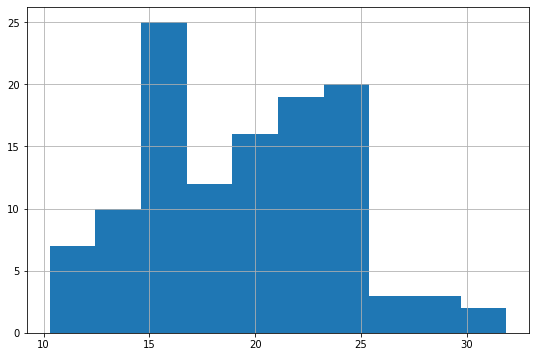

In [12]:
#creates histograms of both 
plt.figure(figsize=(9,6))
fe_2008.hist()

In [13]:
fe_2008.count(), fe_1999.count()

#normality assumption 

(117, 117)

In [14]:
#check variance 
fe_2008.var(), fe_1999.var()

#levene test next

(22.550836772260343, 25.850396545865912)

In [15]:
#levene test 
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [16]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t,p

(-0.3011962975077886, 0.7635345888327115)

In [17]:
print(f'''
Because p({p:.3f})) > alpha (.05), we fail to reject th null\ hypothesis that there is no difference in fuel-efficiency in cars\from 2008 and 1999.''')

#.3f limits to thousandsths place for rounding


Because p(0.764)) > alpha (.05), we fail to reject th null\ hypothesis that there is no difference in fuel-efficiency in carsrom 2008 and 1999.


In [18]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

In [19]:
#create side by side histogram 

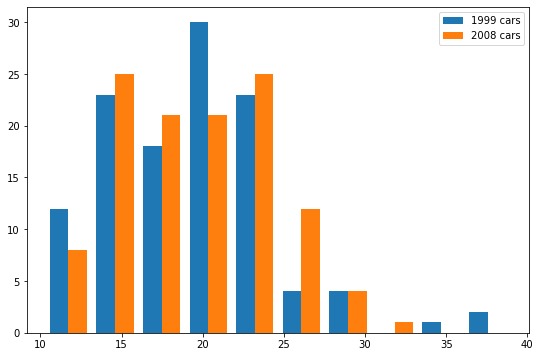

In [20]:
plt.figure(figsize=(9,6))
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

**C. Set Significance Level**

In [21]:
α = .05

In [22]:
#t value and p value 
#because one tail have to do p/2 and t > 0 if compact car goes into function first 

In [23]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

In [24]:
#mean fuel efficeincy of all cars 
m = mpg.avg_fe.mean()

In [25]:
fe_compact.count()

#greater than 30 assume normality

47

<AxesSubplot:>

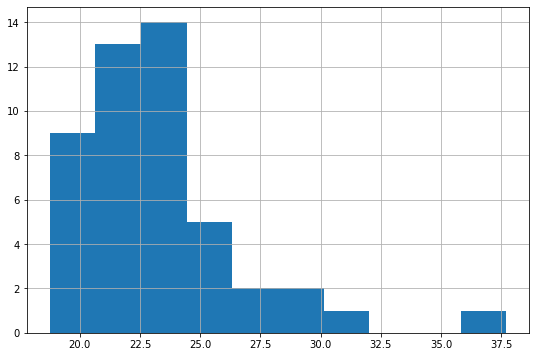

In [26]:
# look at distribution of fuel economy of compact cars. It also shows > 30 observations
# so we meet normality assunption for t-test

plt.figure(figsize=(9,6))
fe_compact.hist()

In [27]:
# calculate t and p values:

t, p = stats.ttest_1samp(fe_compact, μ)
t, p/2, alpha
#significantly less than alpha 

#there appears to be a relationship between compact cars and mpg 

NameError: name 'alpha' is not defined

In [ ]:
print(f'''Because p/2 ({p/2:.11f}) < alpha (.05) and t > 0, we reject the null hypothesis.''')


In [ ]:
mpg.trans.value_counts()

#vehicle counts

In [ ]:
mpg.trans.str.contains('auto')

#find automatic cars 


In [ ]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_man = mpg[mpg.trans.str.contains('manual')].avg_fe

#only automatics 

In [ ]:
#visual of fuel efficiency 
# look at the distribution. N >30

plt.figure(figsize=(9,6))
fe_auto.hist()

In [ ]:
# look at the distribution. N >30

plt.figure(figsize=(9,6))
fe_man.hist()

In [ ]:
#normalcy with counts 
fe_auto.count(), fe_man.count()

In [ ]:
#check variance

fe_auto.var(), fe_man.var()

In [ ]:
stats.levene(fe_auto, fe_man)

In [ ]:
t, p = stats.ttest_ind(fe_man, fe_auto, equal_var = True)

t, p/2

#manual first because checking if manual > auto
# t greater than 1, p < .05 reject null

#there appears to be a significance
#that manual cars get more gas mpg than automatic 

In [ ]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), and t > 0, we reject the null hypothesis''')

In [ ]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')


In [ ]:
plt.figure(figsize=(9,6))
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

# Correlation Exercises 

In [32]:
# read from the SQL database
from get_db_url import make_db

    
df = make_db('telco_churn','SELECT * FROM customers')
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [ ]:
#explore data
df.columns

In [ ]:
#limit scope of dataset


In [ ]:
#identify empty spaces 

In [ ]:
#change blank spaces to null 
df.total_charges = df.total_charges.replace('', np.nan).astype(float)

In [ ]:
df = df.dropna()
#dropping null values 

In [ ]:
df.info()

# 2a. Does tenure correlate with monthly charges?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and monthly_charges.
- $H_a$: There is a linear relationship between tenure and monthly_charges.

In [ ]:
#chart of variables 

df.plot.scatter(y='monthly_charges', x='tenure')

In [ ]:
x = df.tenure
y = df.monthly_charges

In [ ]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

In [ ]:
# 0: No relationship
# 0 - 0.2: Weak positive relationship
# 0.2 - 0.4: Moderate positive relationship
# 0.4 - 1: Strong positive relationship

# 0 - -0.2: Weak negative relationship
# -0.2 - -0.4: Moderate negative relationship
# -0.4 - -1: Strong negative relationship

Conclusion: we reject the null hypothesis that there is no linear relationship between exam score and number of hours studied.

# 2 b. Does tenure correlate with monthly charges?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and total_charges.
- $H_a$: There is a linear relationship between tenure and total_charges.

In [ ]:
df

In [ ]:
#chart of variables 

df.plot.scatter(y='total_charges', x='tenure')

In [ ]:
#from get_db_url import make_db

x = 'tenure'
y = 'total_charges'

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

# 2c. Control for phone and internet service?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and phone and internet service.
- $H_a$: There is a linear relationship between tenure and phone and internet service.

In [ ]:
def corr_tenure_and_monthly(df):
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index = ['r', 'p'])

#function being applied to groupby a couple lines down
# does stats test for each group 

In [ ]:
df.groupby(['internet_service_type', 'phone_service'])

In [ ]:
#do stuff faster with this one trick stakeholders hate!
df.groupby(['internet_service_type', 'phone_service']).apply(corr_tenure_andmonthly)


#what you are controlling goes into group by, what 
#you are testing goes in function of groupby on lines above
#Controlling for something, taking group apart and run test on
#individual pieces, phone service, internet service type being broken apart
#allows to identify no difference between the specific variables, 
#in this example type of internet and yes or no phone service



# 3a. Is there a relationship between how long an employee has been with the company and their salary?
- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and salary.
- $H_a$: There is a linear relationship between tenure and salary.

In [31]:
df = make_db('employees','SELECT * FROM customers')
df

NameError: name 'make_db' is not defined

In [ ]:
employees_with_salaries

In [ ]:
stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)

In [ ]:
sns.replot(data=employees_with_salaries.tenure,)

# 3b. Is there a relationship between how long an employee has been with the company and number of titles they have had?
- $\alpha = .05$
- $H_0$: There is no linear relationship between how long an employee has been with the company and number of titles there have had.
- $H_a$: There is a linear relationship between thow long an employee has been with the company and number of titles there have had.

In [ ]:
# select querry

In [ ]:
employees_with_titles

In [ ]:
stats.pearsonr(employees_with_titles.tenure, employeees_with_titles.n_titles)

# 4. Is there a relationship between days and reaction time?

- $\alpha = .05$
- $H_0$: There is no linear relationship between days and reaction time.
- $H_a$: There is a linear relationship between days and reaction time.

In [ ]:
pydataset.data('sleeepstudy', show_doc=True)

In [ ]:
sleeep = pydataset.data('sleepstudy')
sleep.head()

In [ ]:
stats.pearsonr(sleep.Reaction, sleep.Days) # reject null hypthesis

In [ ]:
sns.lmplot(data=sleep, y='Reaction', x ='Days')

# chi Square Exercises

In [ ]:
import pandas as pd
import numpy as np

from pydataset import data
from scipy import stats

In [ ]:


index = ['Uses a Macbook', 'Does not Use A Macbook']
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.345, .132], [.345, .132]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


In [ ]:
alpha = .05
mpg = data('mpg')

mpg.nunique()

Hypothesis
null - there is no association between the year and cylinder

alternative - there is an association between the year and cylinder 

In [ ]:
mpg.year.value_counts()

In [ ]:
mpg.cyl.value_counts()

In [ ]:
observed = pd.crosstab(mpg.year, mpg.cyl)
observed

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


In [ ]:
p

In [ ]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

In English - We reject the null, so there is an association between the year the car was manufactured and the cylinder type. 

In [40]:
x = '''select emp_no, gender, dept_name
        from employees
            join dept_emp
                using (emp_no)
            join departments
                using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing','Sales')'''

emp = make_db('employees', x)
              
alpha = .05          
              
emp 

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing
...,...,...,...
52538,499966,F,Sales
52539,499976,M,Sales
52540,499980,M,Sales
52541,499986,F,Sales


In [44]:
emp.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [45]:
emp.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [47]:
observed = pd.crosstab(emp.gender, emp.dept_name)

In [48]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [49]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [50]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


In [105]:
x = '''select emp_no, gender, dept_no
        from employees
            left join dept_manager
                using (emp_no)'''

emp = make_db('employees', x)
emp

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [106]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [107]:
#number of people not managers
emp.dept_no.value_counts(dropna=False)

None    300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_no, dtype: int64

In [108]:
#fill in nulls/nones
df.dept_no = emp.dept_no.fillna('not manager')

In [109]:
df.dept_no.value_counts()

not manager    300000
d004                4
d006                4
d009                4
d001                2
d002                2
d003                2
d005                2
d007                2
d008                2
Name: dept_no, dtype: int64

In [110]:
emp.dept_no = emp.dept_no.fillna('not manager')

In [111]:
emp.dept_no.value_counts()

not manager    300000
d004                4
d006                4
d009                4
d001                2
d002                2
d003                2
d005                2
d007                2
d008                2
Name: dept_no, dtype: int64

In [112]:
emp.dept_no = np.where( emp.dept_no != 'not manager', 
                      'manager', 'not manager')

In [113]:
emp.dept_no.value_counts()

not manager    300000
manager            24
Name: dept_no, dtype: int64

In [114]:
observed = pd.crosstab(emp.gender, emp.dept_no)
observed

dept_no,manager,not manager
gender,,
F,13,120038
M,11,179962


In [115]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [116]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[    13 120038]
 [    11 179962]]

Expected
[[     9 120041]
 [    14 179958]]

----
chi^2 = 1.4567
p     = 0.2275


In [117]:
#conclude
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis
